# *Predicting User Engagements for TikTok* 📱♪ 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Load the data

df = pd.read_csv('TikTok profiles dataset (Public web data).csv')

In [30]:
df.head()

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6809397670235407365,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                1000 non-null   object 
 1   account_id               1000 non-null   object 
 2   nickname                 1000 non-null   object 
 3   biography                997 non-null    object 
 4   awg_engagement_rate      1000 non-null   float64
 5   comment_engagement_rate  1000 non-null   float64
 6   like_engagement_rate     1000 non-null   float64
 7   bio_link                 191 non-null    object 
 8   is_verified              1000 non-null   bool   
 9   followers                1000 non-null   int64  
 10  following                1000 non-null   int64  
 11  likes                    1000 non-null   int64  
 12  videos_count             1000 non-null   int64  
 13  create_time              0 non-null      float64
 14  id                       

In [32]:
df.isnull().sum()

timestamp                     0
account_id                    0
nickname                      0
biography                     3
awg_engagement_rate           0
comment_engagement_rate       0
like_engagement_rate          0
bio_link                    809
is_verified                   0
followers                     0
following                     0
likes                         0
videos_count                  0
create_time                1000
id                            0
top_videos                    0
url                           0
profile_pic_url               0
dtype: int64

*Data Preprocessing*

In [33]:
# Remove columns
df = df.drop(['create_time', 'bio_link'], axis=1)

# Rename columns
df = df.rename(columns={
    'awg_engagement_rate': 'avg_engagement_rate',
    'comment_engagement_rate': 'comment_rate',
    'like_engagement_rate': 'like_rate',
    'videos_count': 'video_count'
})

In [34]:
# Handle missing values
df = df.dropna()

# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_clean = ['followers', 'following', 'likes', 'video_count', 'avg_engagement_rate', 'comment_rate', 'like_rate']

for column in columns_to_clean:
    df = remove_outliers(df, column)

In [35]:
df.head()

,timestamp,account_id,nickname,biography,avg_engagement_rate,comment_rate,like_rate,is_verified,followers,following,likes,video_count,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,False,1755,1443,1586,20,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,False,354,1422,3843,225,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,False,1960,243,24000,228,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,False,276,2262,126,4,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
10,2023-07-27,xrb_010,Undercover010🐊,🇦🇱\nF*ck liefde heb gehoord dat je blind kan w...,0.180570,0.004116,0.176454,False,1737,76,31300,21,6978467049120498693,https://www.tiktok.com/@xrb_010/video/72601177...,https://www.tiktok.com/@xrb_010,https://p16-sign-useast2a.tiktokcdn.com/tos-us...


In [36]:
# Check for any remaining missing values

df.isnull().sum()

timestamp              0
account_id             0
nickname               0
biography              0
avg_engagement_rate    0
comment_rate           0
like_rate              0
is_verified            0
followers              0
following              0
likes                  0
video_count            0
id                     0
top_videos             0
url                    0
profile_pic_url        0
dtype: int64

In [37]:
# Summary statistics

df.describe()

,avg_engagement_rate,comment_rate,like_rate,followers,following,likes,video_count,id
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,3.720000e+02
mean,0.082532,0.003592,0.078940,6546.228495,627.822581,48365.973118,80.260753,6.456823e+18
std,0.078694,0.004549,0.076490,11534.919627,692.429374,83451.100617,80.099361,1.591942e+18
min,0.000179,0.000000,0.000000,10.000000,1.000000,16.000000,1.000000,9.001380e+05
25%,0.019421,0.000551,0.018568,478.000000,106.000000,959.500000,17.750000,6.730380e+18
50%,0.059226,0.001581,0.053909,1521.500000,343.500000,7670.000000,46.000000,6.851711e+18
75%,0.125337,0.004955,0.115463,7496.500000,998.750000,54175.000000,122.250000,6.966459e+18
max,0.337762,0.021429,0.326279,67500.000000,2837.000000,407500.000000,319.000000,7.204907e+18


*Data Visualization*

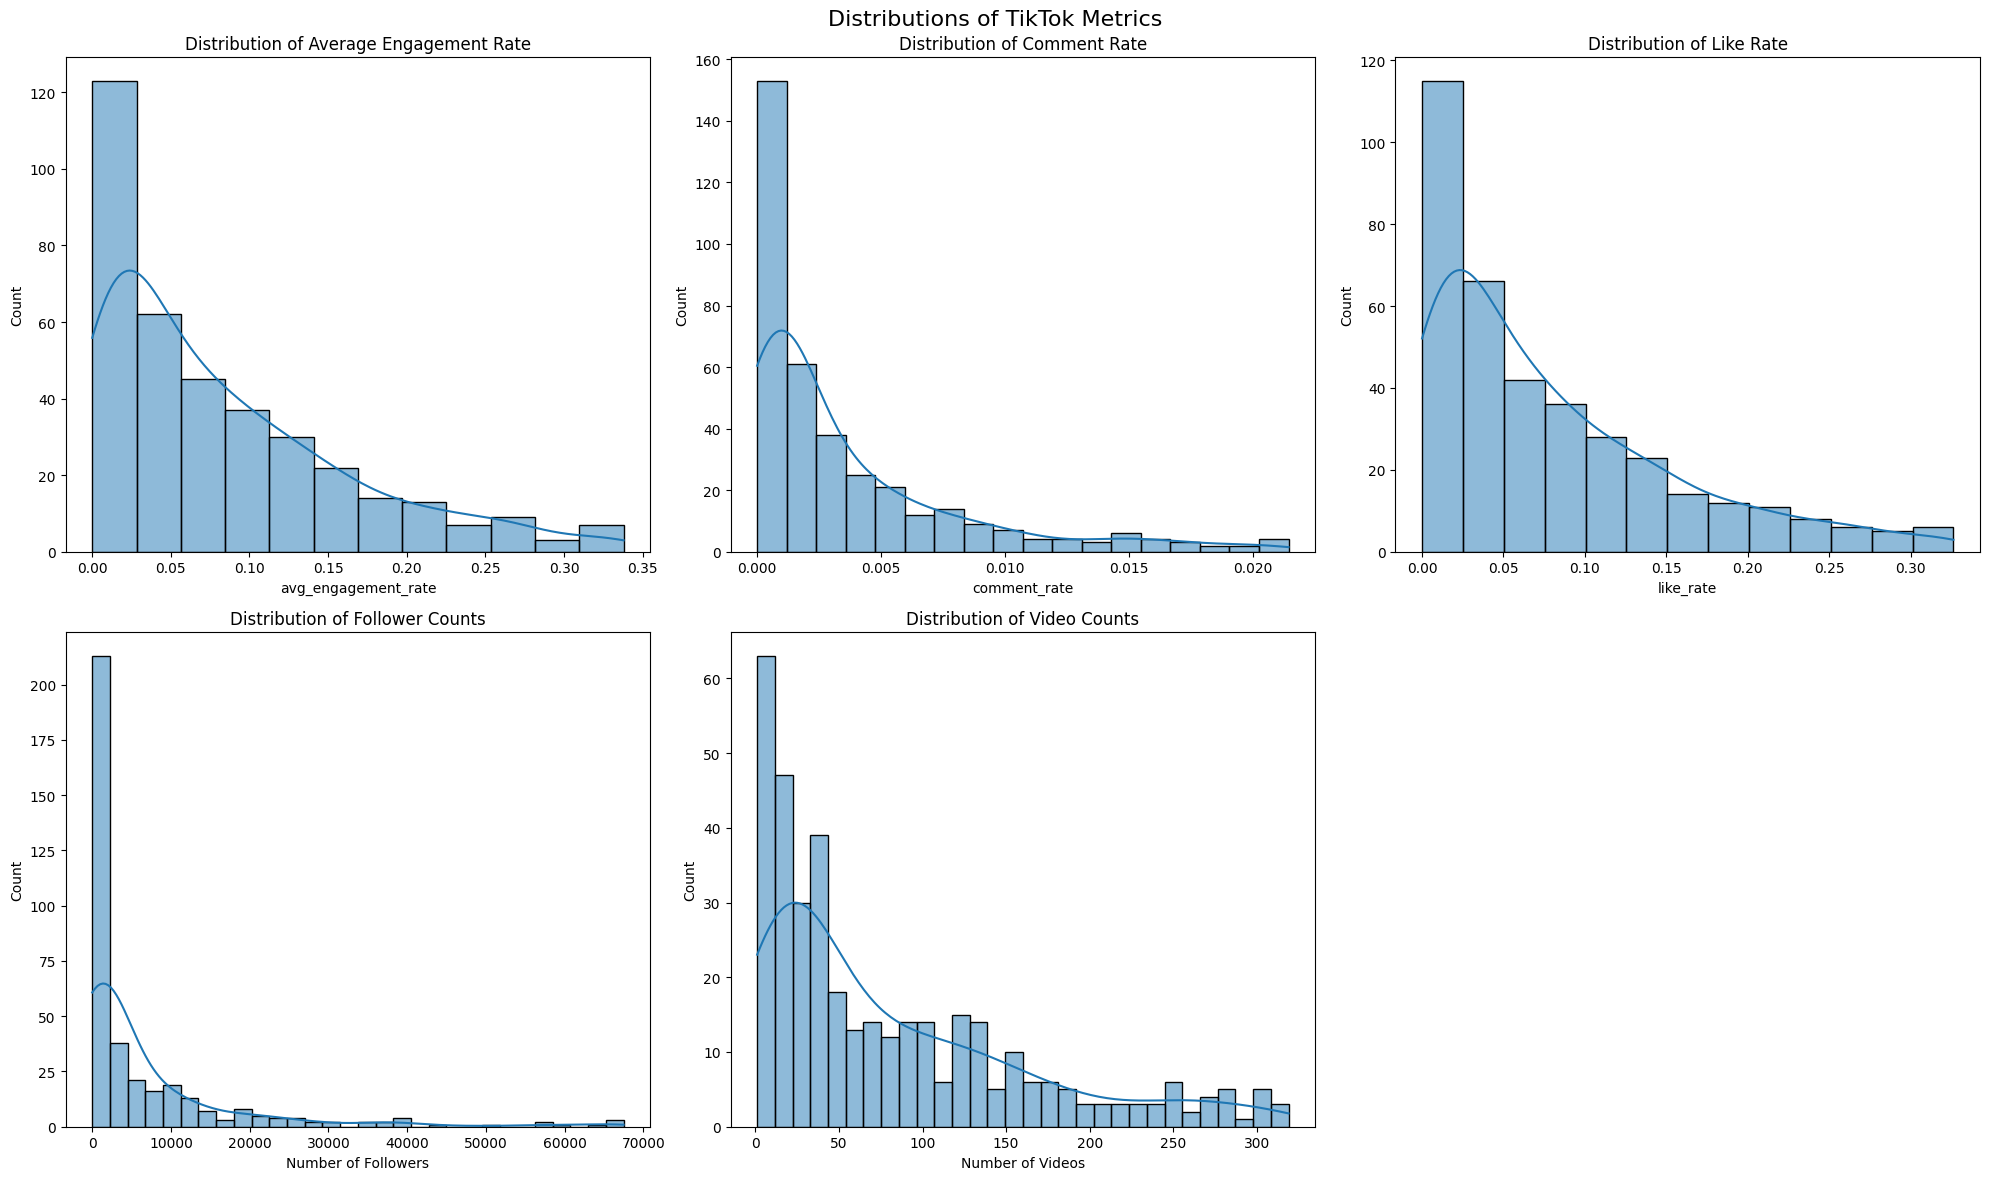

In [38]:
# Create a figure with 5 subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distributions of TikTok Metrics', fontsize=16)

# Distribution of Average Engagement Rate
sns.histplot(df['avg_engagement_rate'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Average Engagement Rate')

# Distribution of Comment Rate
sns.histplot(df['comment_rate'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Comment Rate')

# Distribution of Like Rate
sns.histplot(df['like_rate'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Distribution of Like Rate')

# Distribution of Follower Counts
sns.histplot(df['followers'], kde=True, bins=30, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Follower Counts')
axs[1, 0].set_xlabel('Number of Followers')

# Distribution of Video Counts
sns.histplot(df['video_count'], kde=True, bins=30, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Video Counts')
axs[1, 1].set_xlabel('Number of Videos')

# Remove the unused subplot
fig.delaxes(axs[1, 2])

# Adjust the layout
plt.tight_layout()
plt.show()

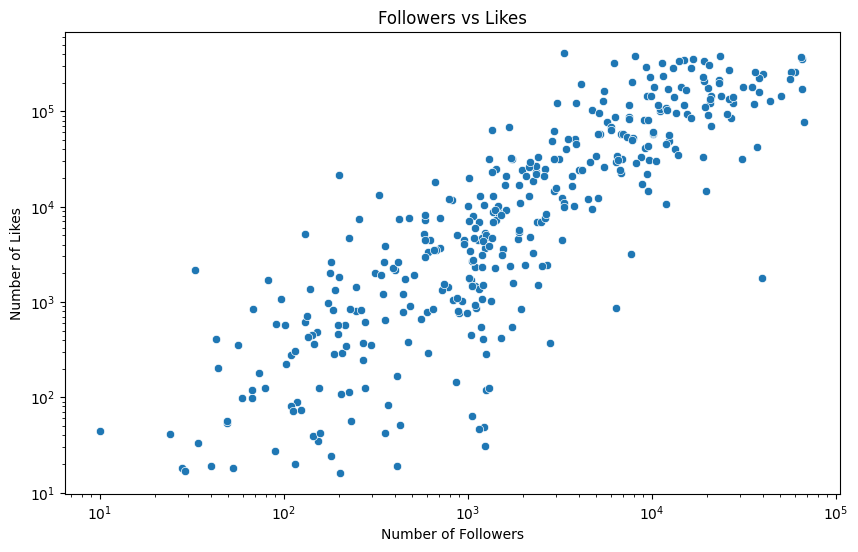

In [39]:
# Scatter plot comparing followers to likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='likes', data=df)
plt.title('Followers vs Likes')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Likes')
plt.xscale('log')
plt.yscale('log')
plt.show()

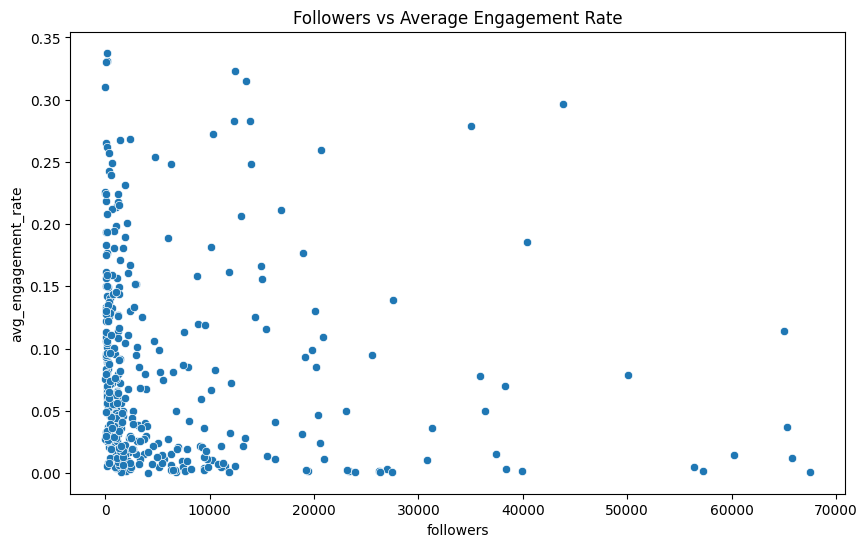

In [40]:
# Scatter plot: Followers vs Average Engagement Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='avg_engagement_rate', data=df)
plt.title('Followers vs Average Engagement Rate')
plt.show()

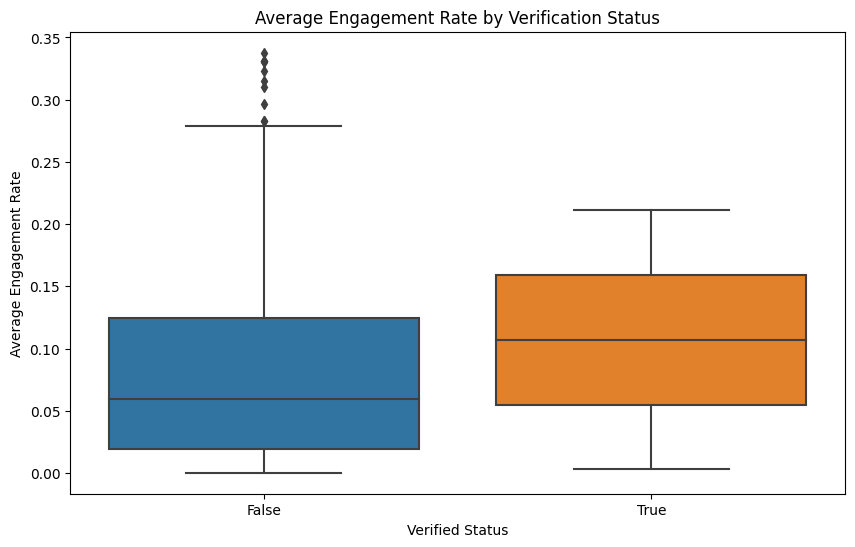

In [41]:
# Box plot of engagement rates by verification status
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_verified', y='avg_engagement_rate', data=df)
plt.title('Average Engagement Rate by Verification Status')
plt.xlabel('Verified Status')
plt.ylabel('Average Engagement Rate')
plt.show()

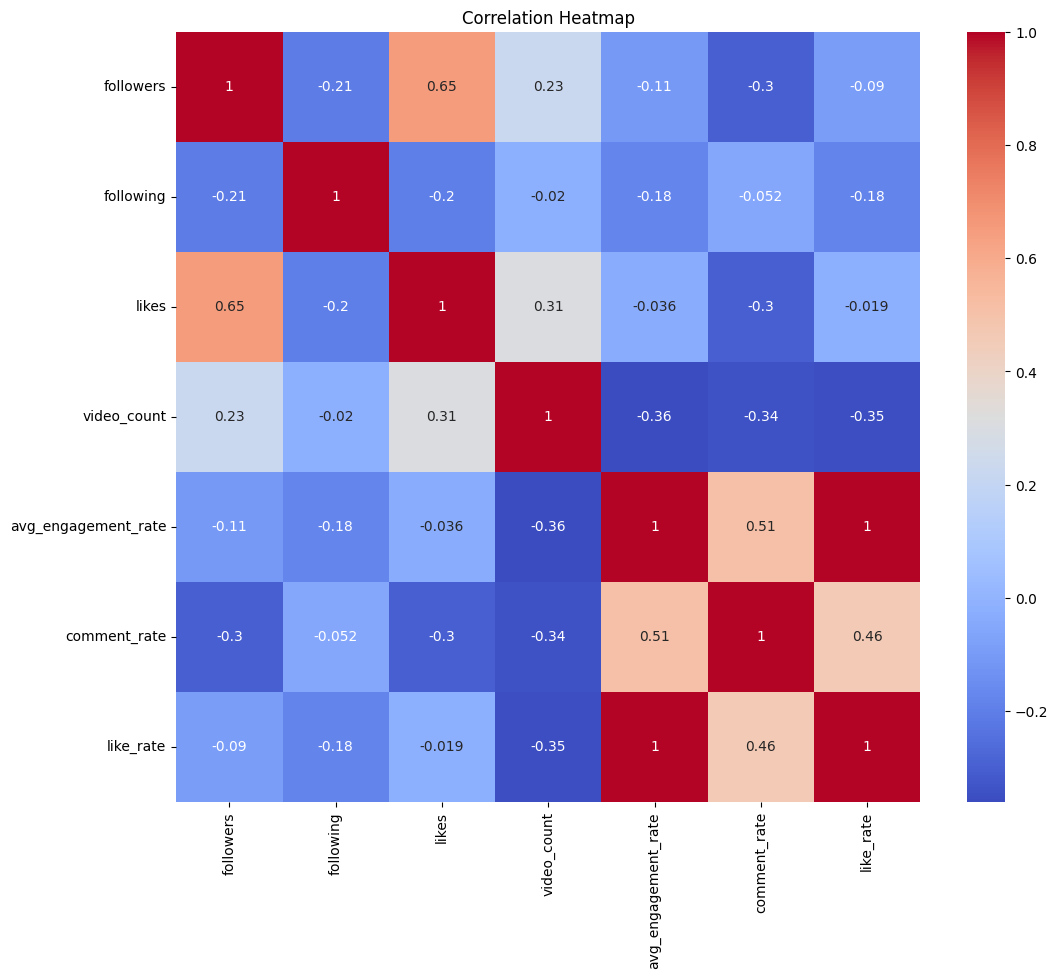

In [42]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[['followers', 'following', 'likes', 'video_count', 'avg_engagement_rate', 'comment_rate', 'like_rate']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

*Exploratory Data Analysis*

In [43]:
# Engagement rate by verification status

df.groupby('is_verified')['avg_engagement_rate'].mean()

is_verified
False    0.082400
True     0.106982
Name: avg_engagement_rate, dtype: float64

In [44]:
# Top 10 profiles by average engagement rate

df.nlargest(10, 'avg_engagement_rate')[['nickname', 'avg_engagement_rate']]

,nickname,avg_engagement_rate
243,Jenni D,0.337762
685,Bapt.bm,0.331318
650,Benjo,0.330825
954,𓆩🖤𝐬𝐡𓆪,0.330357
891,Stefani soberanis,0.323381
233,Shaysaprocky:(,0.314864
519,luvs._wonnie,0.310345
191,Tal,0.296401
164,otismanley25,0.283238
452,Misterios del más alla,0.282646


In [45]:
# Prepare features and target
X = df[['followers', 'following', 'likes', 'video_count']]
y = df['avg_engagement_rate']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Model Evaluation*

In [46]:
# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Linear Regression
lr_model = LinearRegression()
lr_mse, lr_r2 = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)


# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse, rf_r2 = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)


# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_mse, svr_r2 = evaluate_model(svr_model, X_train_scaled, X_test_scaled, y_train, y_test)


from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test_scaled)

# Calculate MSE and R2 score
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

In [47]:
# Print results
print("XGBoost - MSE: {:.4f}, R2: {:.4f}".format(xgb_mse, xgb_r2))
print("Linear Regression - MSE: {:.4f}, R2: {:.4f}".format(lr_mse, lr_r2))
print("Random Forest - MSE: {:.4f}, R2: {:.4f}".format(rf_mse, rf_r2))
print("Support Vector Regression - MSE: {:.4f}, R2: {:.4f}".format(svr_mse, svr_r2))

XGBoost - MSE: 0.0030, R2: 0.2315
Linear Regression - MSE: 0.0042, R2: -0.0828
Random Forest - MSE: 0.0032, R2: 0.1694
Support Vector Regression - MSE: 0.0057, R2: -0.4662


In [51]:
# Print classification metrics for all models

print("\nClassification Metrics for XGBoost Model:")
print(f'Accuracy: {xgb_accuracy}')
print(f'Precision: {xgb_precision}')
print(f'Recall: {xgb_recall}')
print(f'F1 Score: {xgb_f1}')

print("\nClassification Metrics for Linear Regression Model:")
print(f'Accuracy: {lr_accuracy}')
print(f'Precision: {lr_precision}')
print(f'Recall: {lr_recall}')
print(f'F1 Score: {lr_f1}')

print("\nClassification Metrics for Random Forest Model:")
print(f'Accuracy: {rf_accuracy}')
print(f'Precision: {rf_precision}')
print(f'Recall: {rf_recall}')
print(f'F1 Score: {rf_f1}')

print("\nClassification Metrics for Support Vector Regression Model:")
print(f'Accuracy: {svr_accuracy}')
print(f'Precision: {svr_precision}')
print(f'Recall: {svr_recall}')
print(f'F1 Score: {svr_f1}')


Classification Metrics for XGBoost Model:
Accuracy: 0.7333333333333333
Precision: 0.7625059780009564
Recall: 0.7333333333333333
F1 Score: 0.7347578347578346

Classification Metrics for Linear Regression Model:
Accuracy: 0.56
Precision: 0.7082222222222222
Recall: 0.56
F1 Score: 0.5219742968895512

Classification Metrics for Random Forest Model:
Accuracy: 0.7066666666666667
Precision: 0.7700506585612968
Recall: 0.7066666666666667
F1 Score: 0.7041595441595442

Classification Metrics for Support Vector Regression Model:
Accuracy: 0.5066666666666667
Precision: 0.6672916666666666
Recall: 0.5066666666666667
F1 Score: 0.44435087719298244


In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negative because GridSearchCV minimizes

print("Best parameters:", best_params)
print("Best MSE:", best_score)

# Use the best model to make predictions
best_xgb_model = grid_search.best_estimator_
best_xgb_pred = best_xgb_model.predict(X_test_scaled)

# Calculate MSE and R2 score for the best model
best_xgb_mse = mean_squared_error(y_test, best_xgb_pred)
best_xgb_r2 = r2_score(y_test, best_xgb_pred)

print("Tuned XGBoost - MSE: {:.4f}, R2: {:.4f}".format(best_xgb_mse, best_xgb_r2))

Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}
Best MSE: 0.005007364309520116
Tuned XGBoost - MSE: 0.0028, R2: 0.2665


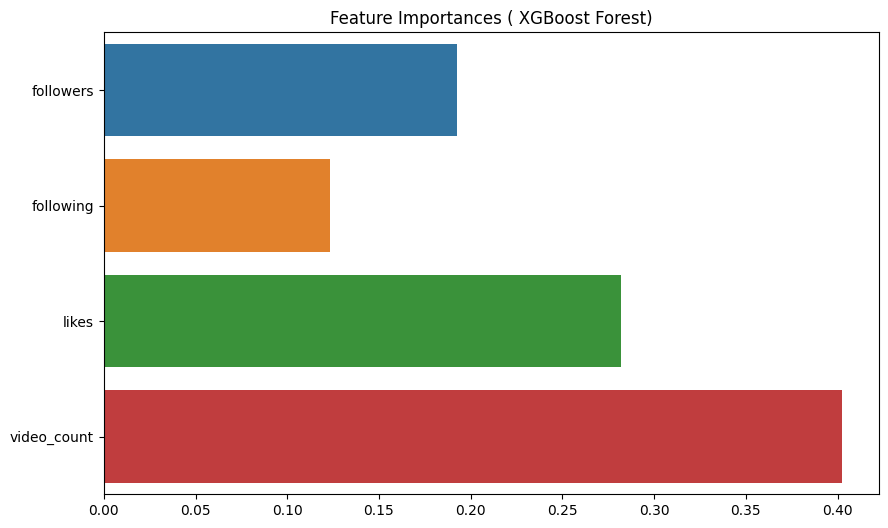

In [50]:
# Plot feature importances for Random Forest
feature_importance = xgb_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importances ( XGBoost Forest)')
plt.show()

## Conclusion


Among the models tested, XGBoost performed the best with the lowest MSE and highest R2 score, followed by Random Forest. Both models, however, indicate that there is significant room for improvement.

Success on the platform requires a balanced approach of consistent content creation, audience building, and maintaining content quality. As TikTok evolves, continuous monitoring and model updates will be crucial for maintaining predictive accuracy.



## Future Work


Feature Engineering:
     Incorporate content-specific features (e.g., hashtags, music)

Hyperparameter Tuning:
     Optimize model performance with techniques such as Grid Search or Random Search.

Temporal Analysis:
     Integrate time-series analysis to capture trends and patterns over time.

Model Interpretability:
    Use tools like SHAP or LIME to gain insights into feature importance and model decisions.

Cross-platform Analysis:
     Expand the study to other social media platforms for a broader perspective on user engagement.

Investigate the impact of TikTok algorithm changes on engagement.
